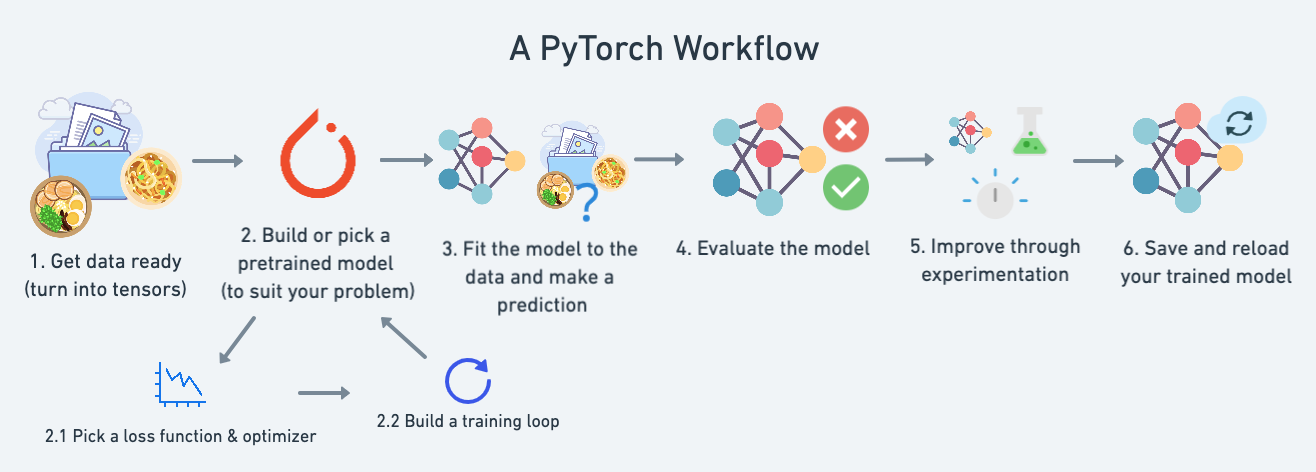

In [721]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

import matplotlib.pyplot as plt
import seaborn as sns

In [722]:
torch.__version__

'2.5.1+cu124'

In [723]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)
y = weight * X +bias

X.shape , y.shape

(torch.Size([50]), torch.Size([50]))

In [724]:
X[:5] , y[:5]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560]))

In [725]:
train_split = int(0.8*len(X))

X_train , X_test = X[:train_split] , X[train_split:]
y_train , y_test = y[:train_split] , y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)


(40, 10, 40, 10)

In [726]:
def plot_predictions(X_train,
                     y_train,
                     X_test,
                     y_test,
                     prediction = None):
   '''
    Plot predictions is a function to plot data and if you have a prediction you can compare it to the original data
   '''

   plt.figure(figsize=(10, 7))
   plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
   plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

   if prediction is not None:
      plt.scatter(X_test , prediction , c= 'r', s=4, label= "Predictions")
   plt.legend(prop={"size": 14})
   plt.show()

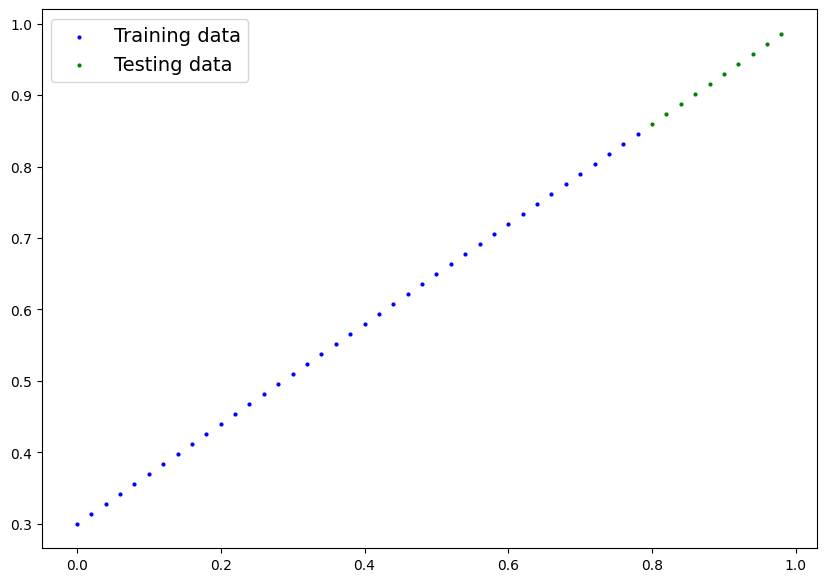

In [727]:
plot_predictions(X_train,
                     y_train,
                     X_test,
                     y_test)

# build model to predict

In [728]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,dtype = torch.float),
                               requires_grad = True)
    self.bias   = nn.Parameter(torch.randn(1,dtype = torch.float
                                           ),
                               requires_grad = True)

  def forward(self ,x :torch.tensor) -> torch.tensor:
      return self.weight * x + self.bias


In [729]:
#manual_seed
torch.manual_seed(42)

mdoel0 = LinearRegressionModel()

In [730]:
list(mdoel0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [731]:
mdoel0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [732]:
with torch.inference_mode():
  y_pred = mdoel0(X_test)

In [733]:
print(len(y_pred))
print(len(X_test))

10
10


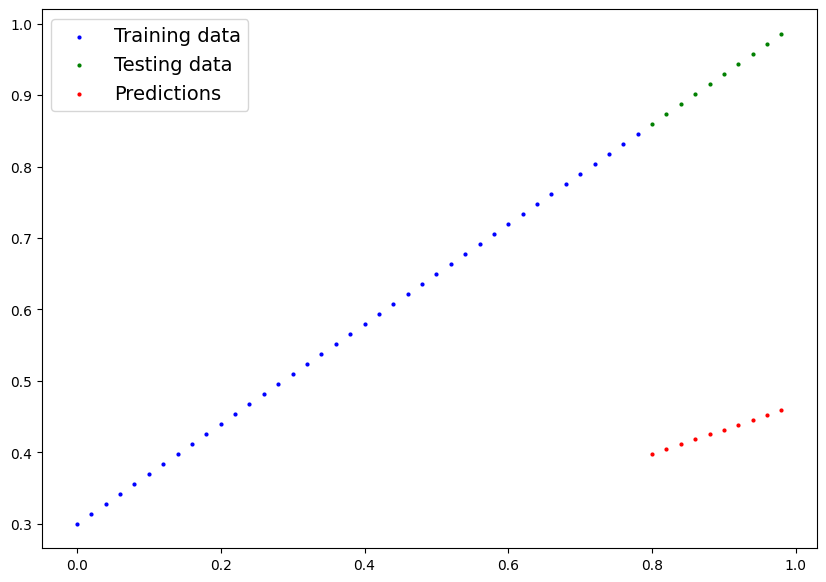

In [734]:
plot_predictions(X_train,
                     y_train,
                     X_test,
                     y_test,
                     y_pred)

## how to train a model ?

## Right now our model is making predictions using random parameters values what we want to do is to update the model parameters to reach the optimal parameters

### Creating a loss function and an optimizer

### loss function : Measures how wrong your models predictions are
### optimizer : Guides your model to updates the parameters to lower the loss function (learning rate)

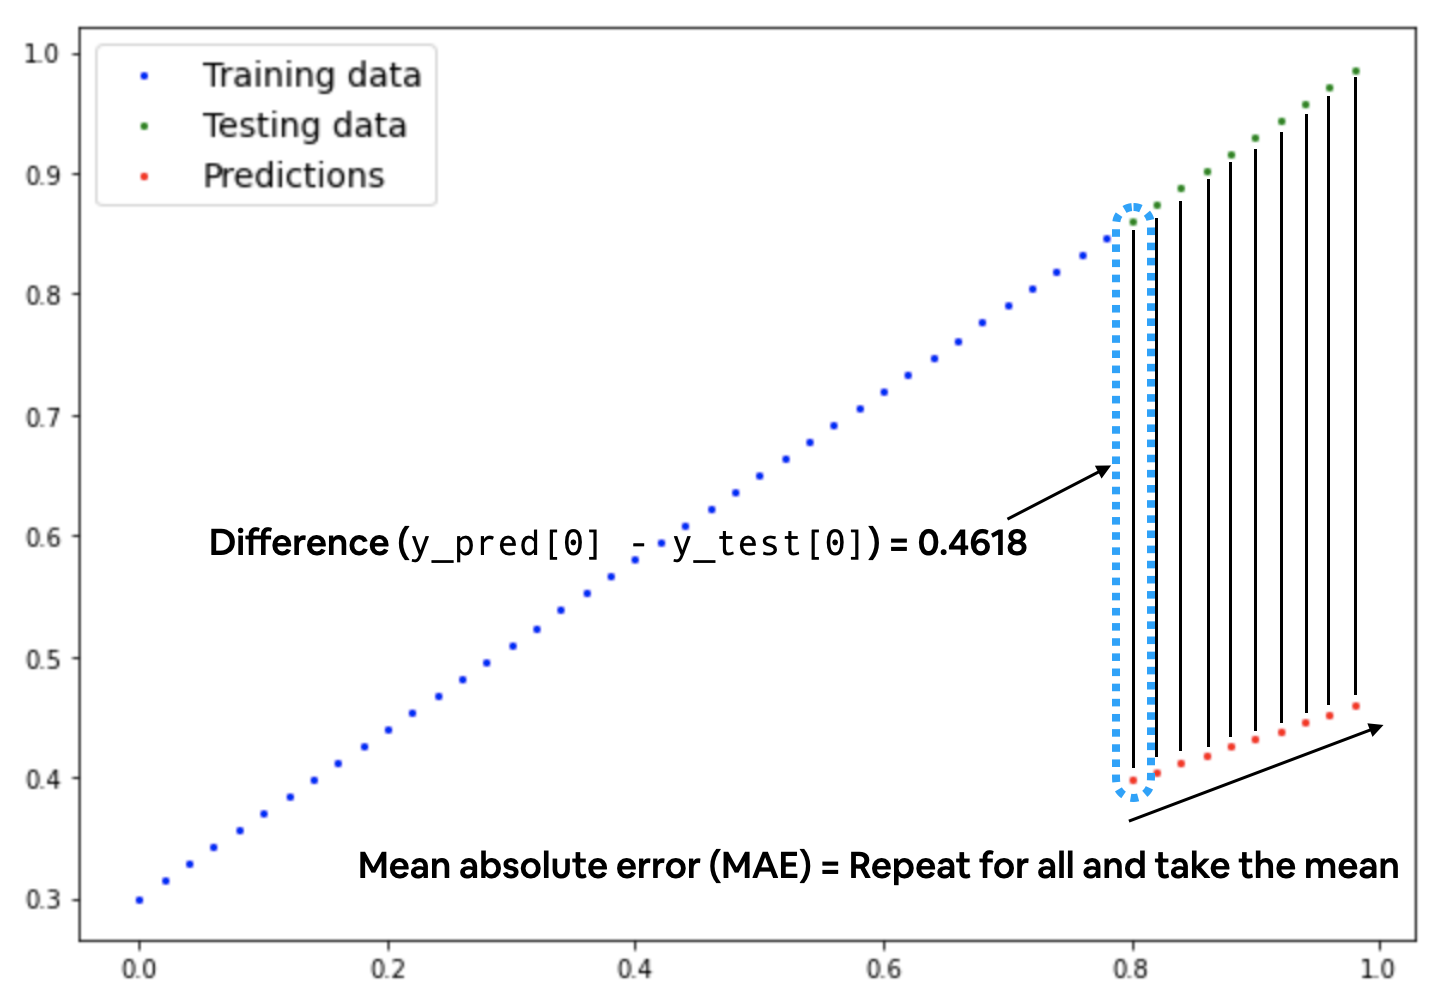

In [735]:
loss_fn = nn.L1Loss()     #MAE
optimizer =SGD(params = mdoel0.parameters(),lr=0.1)

### PyTorch training loop and Testing loop
#### For the training loop, we'll build the following steps:

* Forward pass
* Calculate the loss
* Zero gradients
* Perform backpropagation on the loss
* Update the optimizer (gradient descent)

In [736]:
torch.manual_seed(42)

epochs = 100

#create some lists to track results

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training
    mdoel0.train()


    # 1. Forward pass

    y_pred = mdoel0(X_train) # -> (y_pred , y_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)

    # 3. 	Zero gradients
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss
    loss.backward()

    # 5. Update the optimizer (gradient descent)
    optimizer.step()



    # Testing

    # put the model in the evaluation mode
    mdoel0.eval()

    with torch.inference_mode():
        test_pred = mdoel0(X_test)

        # 2. calculate the test loss
        test_loss = loss_fn(test_pred,y_test)

    # print what's going on
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch : {epoch} | MAE Train loss : {loss} | MAE Testing loss : {test_loss}")

Epoch : 0 | MAE Train loss : 0.31288138031959534 | MAE Testing loss : 0.35982614755630493
Epoch : 10 | MAE Train loss : 0.025432366877794266 | MAE Testing loss : 0.05427704378962517
Epoch : 20 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 30 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 40 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 50 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 60 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 70 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 80 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486
Epoch : 90 | MAE Train loss : 0.039773717522621155 | MAE Testing loss : 0.11934101581573486


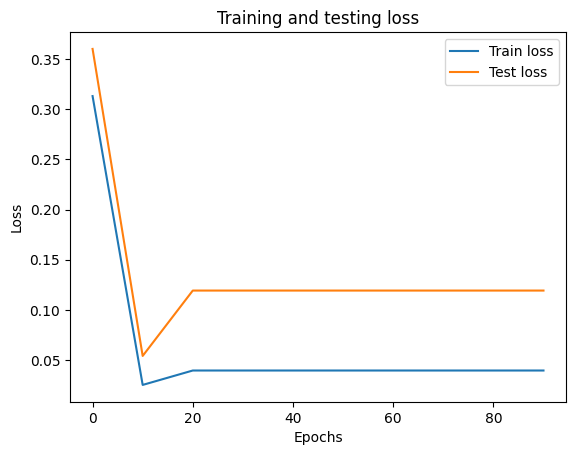

In [737]:
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [738]:
mdoel0.state_dict()

OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

In [739]:
y_pred

tensor([0.2588, 0.2711, 0.2833, 0.2955, 0.3078, 0.3200, 0.3323, 0.3445, 0.3568,
        0.3690, 0.3812, 0.3935, 0.4057, 0.4180, 0.4302, 0.4425, 0.4547, 0.4670,
        0.4792, 0.4914, 0.5037, 0.5159, 0.5282, 0.5404, 0.5527, 0.5649, 0.5771,
        0.5894, 0.6016, 0.6139, 0.6261, 0.6384, 0.6506, 0.6629, 0.6751, 0.6873,
        0.6996, 0.7118, 0.7241, 0.7363], grad_fn=<AddBackward0>)

In [740]:
# y_pred =y_pred.detach().numpy()

In [741]:
y_pred

tensor([0.2588, 0.2711, 0.2833, 0.2955, 0.3078, 0.3200, 0.3323, 0.3445, 0.3568,
        0.3690, 0.3812, 0.3935, 0.4057, 0.4180, 0.4302, 0.4425, 0.4547, 0.4670,
        0.4792, 0.4914, 0.5037, 0.5159, 0.5282, 0.5404, 0.5527, 0.5649, 0.5771,
        0.5894, 0.6016, 0.6139, 0.6261, 0.6384, 0.6506, 0.6629, 0.6751, 0.6873,
        0.6996, 0.7118, 0.7241, 0.7363], grad_fn=<AddBackward0>)

In [742]:
test_pred

tensor([0.8798, 0.8928, 0.9058, 0.9188, 0.9319, 0.9449, 0.9579, 0.9709, 0.9840,
        0.9970])

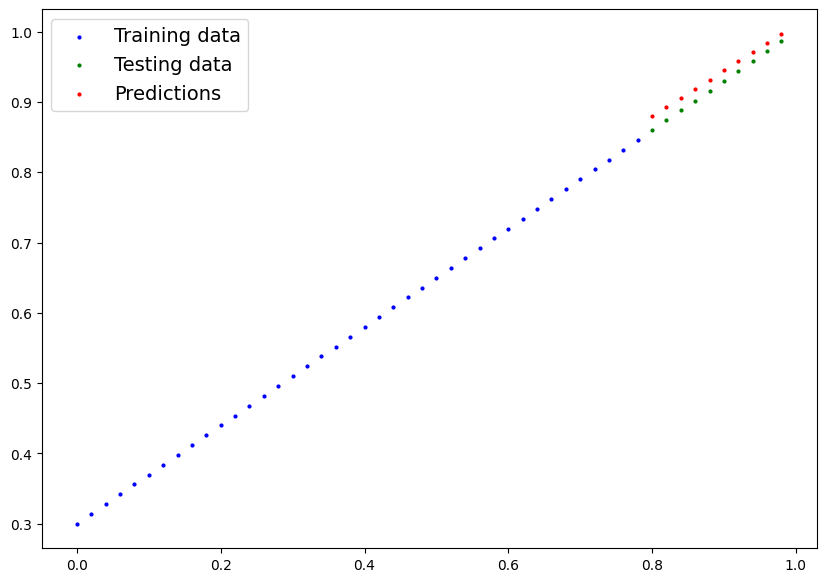

In [743]:
plot_predictions(X_train,
                     y_train,
                     X_test,
                     y_test,
                     test_pred)

In [744]:
y_pred.device

device(type='cpu')

In [745]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
device

'cpu'

In [746]:
y_pred.to(device)

tensor([0.2588, 0.2711, 0.2833, 0.2955, 0.3078, 0.3200, 0.3323, 0.3445, 0.3568,
        0.3690, 0.3812, 0.3935, 0.4057, 0.4180, 0.4302, 0.4425, 0.4547, 0.4670,
        0.4792, 0.4914, 0.5037, 0.5159, 0.5282, 0.5404, 0.5527, 0.5649, 0.5771,
        0.5894, 0.6016, 0.6139, 0.6261, 0.6384, 0.6506, 0.6629, 0.6751, 0.6873,
        0.6996, 0.7118, 0.7241, 0.7363], grad_fn=<AddBackward0>)

In [747]:
mdoel0=mdoel0.to(device)

In [748]:
next(mdoel0.parameters()).device

device(type='cpu')

In [749]:
for i in [X_train,y_train,X_test,y_test,test_pred]:
  i=i.to(device)
  print(i.device)

cpu
cpu
cpu
cpu
cpu


In [750]:
y_test.device

device(type='cpu')

In [751]:
mdoel0.to("cpu")

LinearRegressionModel()

In [752]:
mdoel0.state_dict()

OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

# how to save and load a pytorch model ?



*  torch.save
*  torch.load

In [753]:
torch.save(mdoel0,"model_0")

In [754]:
torch.save(mdoel0,"model_0.pt")

In [755]:
torch.save(mdoel0,"model_0.pth")

In [756]:
#laod
model_0=torch.load("/content/model_0.pt")

<ipython-input-756-a169d0540d07>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0=torch.load("/content/model_0.pt")


In [757]:
model_0.state_dict()


OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

### saving and laod using pathlib

In [758]:
from pathlib import Path

In [759]:
model_path = Path("models")

model_path_name = model_path.mkdir(parents=True , exist_ok= True)
MODEL_NAME = '01-workflow-model.pth'

model_save_path = model_path / MODEL_NAME


In [760]:
torch.save(model_0,model_save_path)

In [761]:
#laod
model_0=torch.load("/content/models/01-workflow-model.pth")

<ipython-input-761-3a2afea9bf9f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0=torch.load("/content/models/01-workflow-model.pth")


In [762]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

# how to travel from model to anthore

In [763]:
model1= model_0

In [764]:
model1.state_dict()

OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

# anthore

In [765]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [766]:
model_1.load_state_dict(model1.state_dict())

<All keys matched successfully>

In [767]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.6512])), ('bias', tensor([0.3588]))])

In [768]:
model_2 = LinearRegressionModel()
model_2.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

#test

In [769]:
model_1.eval()
with torch.inference_mode():
  y_pred_2=model_1(X_test)

In [770]:
y_pred_2 == test_pred

tensor([True, True, True, True, True, True, True, True, True, True])

## fully connected network

### from scratch

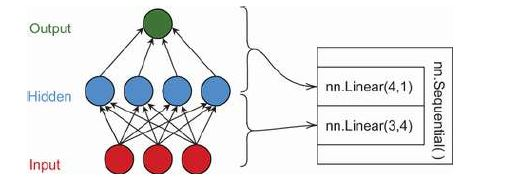

In [771]:
import numpy as np

In [772]:
torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

In [773]:
X.shape ,y.shape

((200,), (200,))

In [774]:
X[0] , y[0]

(0.0, -2.5814714101840033)

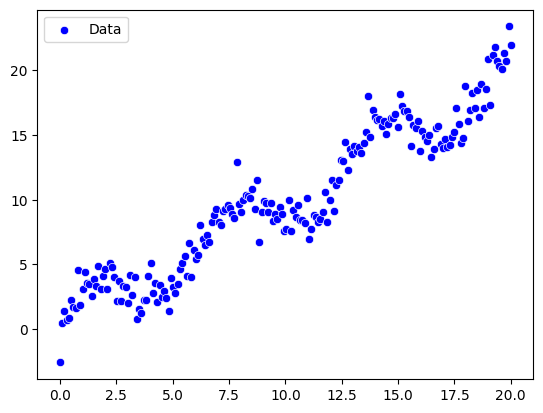

In [775]:
sns.scatterplot(x=X, y=y, color='Blue', label="Data")  # Use x and y as named arguments
plt.show()

In [776]:
from torch.utils.data import Dataset , DataLoader




In [777]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]


In [778]:
df= Simple1DRegressionDataset(X,y)

In [779]:
df[0]

(tensor([0.]), tensor([-2.5815]))

In [780]:
## lets make a dataloader for the dataset
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [781]:
training_loader

In [782]:
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[6.7398]])]

In [783]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)


In [784]:
# construct the model using Linear block

in_feature = 1
out_feature = 1
model_3= nn.Linear(in_feature ,out_feature )

In [785]:
from tqdm.autonotebook import tqdm

In [786]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()


In [787]:
device = "CUDA" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [788]:
train_simple_network(model_3,
                         loss_fn,
                         training_loader,
                         epochs =10,
                         optimizer = optimizer,
                         device = device)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [789]:
X.shape

(200,)

In [790]:
# try_model
model_3.eval()

with torch.inference_mode():
    y_pred_m2 = model_3(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

In [791]:
y_pred_m2.shape

(200, 1)

#ravel to make numpy is one dim like reshape for tensor

<Axes: >

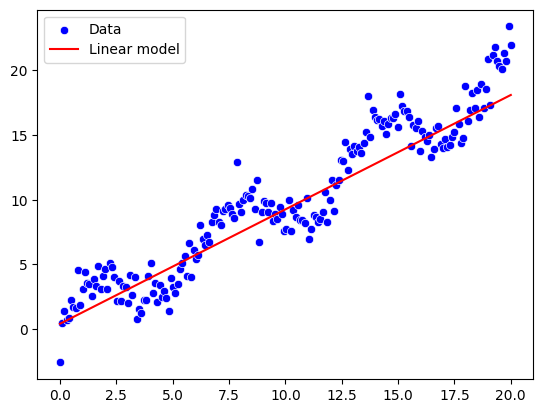

In [792]:
sns.scatterplot(x=X,y= y,color="Blue",label="Data")
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')

In [793]:
model_3 = nn.Sequential(
    nn.Linear(1,5),
    nn.Linear(5,1)
)

# or instead  nn.Linear(1,5,1)


In [794]:
train_simple_network(model_3,
                         loss_fn,
                         training_loader,
                         epochs =100,
                         optimizer = optimizer,
                         device = device)

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [795]:
# try_model
model_3.eval()

with torch.inference_mode():
    y_pred_m2 = model_3(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

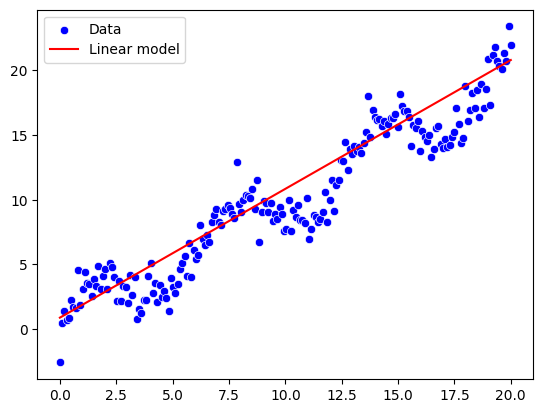

In [796]:
sns.scatterplot(x=X,y= y,color="Blue",label="Data")
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')

In [797]:
# use tansh
model_4 = nn.Sequential(
    nn.Linear(1,5),
    nn.Tanh(),
    nn.Linear(5,1)
)

# or instead  nn.Linear(1,5,1)


In [798]:
train_simple_network(model_4,
                         loss_fn,
                         training_loader,
                         epochs =100,
                         optimizer = optimizer,
                         device = device)

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [799]:
# try_model
model_4.eval()

with torch.inference_mode():
    y_pred_m4 = model_4(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

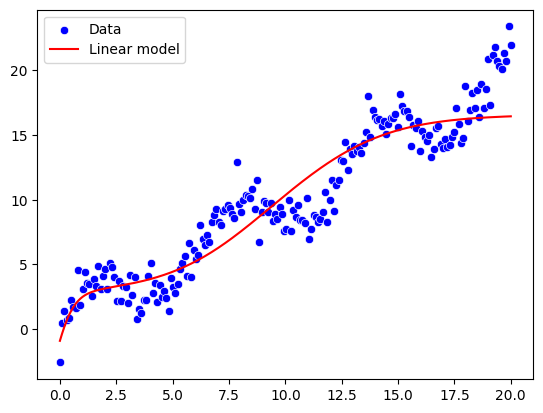

In [800]:
sns.scatterplot(x=X,y= y,color="Blue",label="Data")
sns.lineplot(x=X,y=y_pred_m4.ravel(),color='red',label='Linear model')